#Projeto: Análise Exploratória de Dados de Câncer

Grupo:

Adriel Ferreira Trajano

Jéssica Chaves Nagahama

Kamily Assis de Oliveira

#Introdução

###**Motivação e Objetivos**

 Nosso projeto foi iniciado a fim de observar a variância dos dados sobre mortes causadas por Neoplasia (câncer) em diferentes faixas etarias ao redor do mundo, nos 3 países com maiores, e nos 3 países com menores, investimentos públicos em saúde, e a relação direta do investimento público com a quantidade de casos registrados até o ano de 2019.


  Temos como principal motivação, a partir da manipulação de dados para visualização facilitada, torná-los mais acessíveis ao público. Possibilitando, assim, que cada vez mais pessoas se tornem socialmente conscientes sobre a importância das políticas públicas no tratamento do Crescimento Desordenado de Células (Neoplasia).


###**A fim de satisfazer tais objetivos, elaborou-se as seguintes questões:**


1) Qual é a faixa etária que mais morre nesses países?

2) Para cada faixa etária, qual o país com a maior taxa?

3) Qual é o país mais constante? 

4) Qual é o país com maior queda de casos entre 2015 e 2019?

5) Qual o país que teve o maior crescimento, e qual teve o maior decrescimento, em suas taxas ao passar dos anos?

6) No ano de mais baixas, qual o país com maior, e qual o país com menor, investimento público em saúde?

### 1. Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

#Dataset 1 - Health Expenditure

*Descrição do dataset "Hare of Public Expenditure on Healthcare by Country"*

  Neste dataset tivemos acesso as informações de investimento em saúde pública de diversos países ao redor do mundo até 2019.

  Foi a partir da limpeza e manipulação dessas informações que tivemos acesso aos 6 países que serão estudados durante todo o processo em questão, são esses paises, do maior para o menor investimento:
 
Brunei                                                                         
Cuba                                                                           
Kiribati  
Guinea                           
Democratic Republic of Congo     
Afghanistan   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#he = health expenditure
df_he = pd.read_csv("/content/drive/MyDrive/Projeto ICD/share-of-public-expenditure-on-healthcare-by-country.csv")

In [ ]:
df_he

,Entity,Code,Year,Domestic general government health expenditure (% of current health expenditure)
0,Afghanistan,AFG,2002,0.891424
1,Afghanistan,AFG,2003,7.280444
2,Afghanistan,AFG,2004,5.535272
3,Afghanistan,AFG,2005,5.319348
4,Afghanistan,AFG,2006,4.686539
...,...,...,...,...
4029,Zimbabwe,ZWE,2015,20.817961
4030,Zimbabwe,ZWE,2016,23.307768
4031,Zimbabwe,ZWE,2017,24.019287
4032,Zimbabwe,ZWE,2018,32.061230


In [ ]:
"GHE = % Govt. Health Expenditure"
df_he = df_he.rename(columns={"Domestic general government health expenditure (% of current health expenditure)": "GHE", "Entity":"Country"})

In [ ]:
df_he

,Country,Code,Year,GHE
0,Afghanistan,AFG,2002,0.891424
1,Afghanistan,AFG,2003,7.280444
2,Afghanistan,AFG,2004,5.535272
3,Afghanistan,AFG,2005,5.319348
4,Afghanistan,AFG,2006,4.686539
...,...,...,...,...
4029,Zimbabwe,ZWE,2015,20.817961
4030,Zimbabwe,ZWE,2016,23.307768
4031,Zimbabwe,ZWE,2017,24.019287
4032,Zimbabwe,ZWE,2018,32.061230


In [ ]:
colunas_he = df_he.columns[3:]

means_he = {}

for colunahe in colunas_he:
    means_he[colunahe] = df_he.groupby('Country')[colunahe].mean().sort_values(ascending=False)

    # Exibir as medias calculadas para cada coluna
for colunahe, medias_he in means_he.items():
    print(f"Media da coluna '{colunahe}':")
    print(medias_he)
    print()

Media da coluna 'GHE':
Country
Brunei                          89.267250
Cuba                            87.011646
Kiribati                        85.891249
Tuvalu                          84.708037
Luxembourg                      84.689162
                                  ...    
Comoros                         11.950217
South Sudan                     11.886550
Guinea                          10.767720
Democratic Republic of Congo     9.296861
Afghanistan                      5.208080
Name: GHE, Length: 205, dtype: float64



In [ ]:
agrupamento = pd.concat([medias_he.groupby('Country').head(3), medias_he.groupby('Country').tail(3)])
agrupamento

Country
Brunei                          89.267250
Cuba                            87.011646
Kiribati                        85.891249
Tuvalu                          84.708037
Luxembourg                      84.689162
                                  ...    
Comoros                         11.950217
South Sudan                     11.886550
Guinea                          10.767720
Democratic Republic of Congo     9.296861
Afghanistan                      5.208080
Name: GHE, Length: 410, dtype: float64

In [ ]:
top3maior = medias_he.head(3)
top3menor = medias_he.tail(3)
top3_maior_menor = pd.concat([top3maior, top3menor])
top3_maior_menor

Country
Brunei                          89.267250
Cuba                            87.011646
Kiribati                        85.891249
Guinea                          10.767720
Democratic Republic of Congo     9.296861
Afghanistan                      5.208080
Name: GHE, dtype: float64

<Axes: xlabel='Year', ylabel='GHE'>

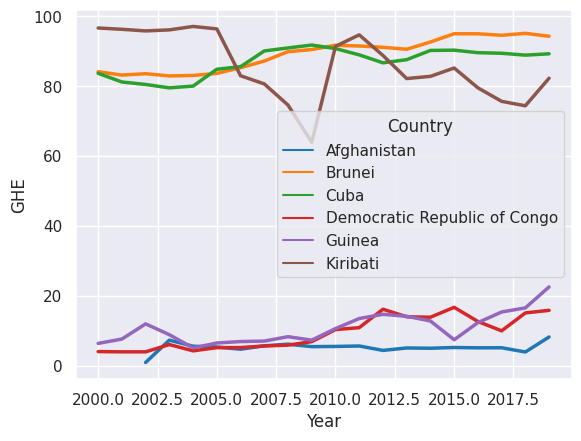

In [ ]:
df_chosen = df_he.loc[(df_he["Country"].isin(top3_maior_menor.index))]
sns.lineplot(data=df_chosen, x="Year", y="GHE", linewidth=2.5, palette="tab10", hue="Country")

<Axes: xlabel='Year', ylabel='50 < DNS < 69'>

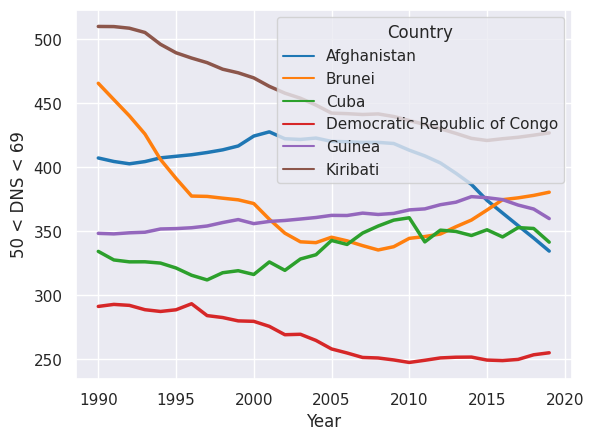

In [ ]:
df_maior_menor = df.loc[(df["Country"].isin(top3_maior_menor.index))]
sns.lineplot(data=df_maior_menor, x="Year", y="50 < DNS < 69", linewidth=2.5, palette="tab10", hue="Country")

# Dataset 2 - Cancer Death Rates by Age

*Descrição do dataset "Cancer Death Rates by Age"*

  Neste dataset tivemos acesso as informações de casos de Neoplasia (câncer) até 2019, em diferentes faixas etárias nos países determinados no dataset acima.

  E a partir da limpeza e manipulação dessas informações fomos capazes de responder as problemáticas determinadas anteriormente.

##Exploração Inicial

### 2. Leitura e Pré-processamento de Dados

#### 2.1 Dataframe recebe CSV

Dataset 1: Taxas de mortalidade Por Idade

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projeto ICD/cancer-death-rates-by-age.csv")

In [ ]:
df

,Entity,Code,Year,Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate),Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate),Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate),Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate),Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)
0,Afghanistan,AFG,1990,21.333432,159.964864,101.409895,1021.494249,9.372839,407.233106,43.620659
1,Afghanistan,AFG,1991,18.701225,158.455892,93.714269,1013.760277,9.456989,404.506587,40.530804
2,Afghanistan,AFG,1992,16.801217,157.390960,84.011048,1007.834265,9.737245,402.687908,37.166581
3,Afghanistan,AFG,1993,16.527773,157.574448,79.038807,1006.565188,9.832934,404.419442,35.723897
4,Afghanistan,AFG,1994,16.527686,158.031726,77.173172,1006.363704,9.564733,407.332265,35.458716
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.642187,182.596478,79.281072,1340.306429,2.495452,465.147739,34.026731
6836,Zimbabwe,ZWE,2016,2.753739,182.424420,80.128518,1336.598159,2.683036,464.267622,34.769286
6837,Zimbabwe,ZWE,2017,2.752663,181.835774,80.769870,1333.762807,2.768516,461.892531,35.273065
6838,Zimbabwe,ZWE,2018,2.718565,181.356873,81.484036,1330.364400,2.797381,458.788271,35.747494


#### Criando um array com o nome de todas as entidades do Dataframe

In [ ]:
valores_unicos = df['Entity'].unique()
valores_unicos

array(['Afghanistan', 'African Region (WHO)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Eu

#### Separando as entidades que são regiões

In [ ]:
#regions

array_regions = []

for palavra in valores_unicos:
    if 'Region' in palavra or 'WB' in palavra or 'WHO' in palavra:
        array_regions.append(palavra)

df_regions= pd.DataFrame(array_regions, columns=['Regions'])

print(df_regions)

                               Regions
0                 African Region (WHO)
1             East Asia & Pacific (WB)
2   Eastern Mediterranean Region (WHO)
3           Europe & Central Asia (WB)
4                European Region (WHO)
5       Latin America & Caribbean (WB)
6      Middle East & North Africa (WB)
7                   North America (WB)
8         Region of the Americas (WHO)
9                      South Asia (WB)
10        South-East Asia Region (WHO)
11             Sub-Saharan Africa (WB)
12        Western Pacific Region (WHO)


#### Separando as entidades que são agrupamentos de países de acordo com a renda

In [ ]:
#países de acordo com a renda
array_country_income = []

for palavra in valores_unicos:
    if 'Income' in palavra:
        array_country_income.append(palavra)

df_country_income= pd.DataFrame(array_country_income, columns=['Country Income'])

print(df_country_income)

                   Country Income
0          World Bank High Income
1           World Bank Low Income
2  World Bank Lower Middle Income
3  World Bank Upper Middle Income


#### Retirando as entidades que não são países

In [ ]:
#retirando

# Obter os valores únicos da coluna 'Entity' que atendem ao critério
array_not_a_country = []

for palavra in valores_unicos:
    if 'G20' in palavra or 'WB' in palavra or 'WHO' in palavra or 'Income' in palavra:
        array_not_a_country.append(palavra)

df_not_a_country = pd.DataFrame(array_not_a_country, columns=['Not a Country'])


In [ ]:
df_not_a_country

,Not a Country
0,African Region (WHO)
1,East Asia & Pacific (WB)
2,Eastern Mediterranean Region (WHO)
3,Europe & Central Asia (WB)
4,European Region (WHO)
5,G20
6,Latin America & Caribbean (WB)
7,Middle East & North Africa (WB)
8,North America (WB)
9,Region of the Americas (WHO)


In [ ]:
# Eliminar os valores presentes em df_regions do DataFrame df
df = df[~df['Entity'].isin(df_not_a_country['Not a Country'])]

# Exibir o DataFrame após a eliminação
print("\nDataFrame após a eliminação:")
df


DataFrame após a eliminação:


,Entity,Code,Year,Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate),Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate),Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate),Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate),Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)
0,Afghanistan,AFG,1990,21.333432,159.964864,101.409895,1021.494249,9.372839,407.233106,43.620659
1,Afghanistan,AFG,1991,18.701225,158.455892,93.714269,1013.760277,9.456989,404.506587,40.530804
2,Afghanistan,AFG,1992,16.801217,157.390960,84.011048,1007.834265,9.737245,402.687908,37.166581
3,Afghanistan,AFG,1993,16.527773,157.574448,79.038807,1006.565188,9.832934,404.419442,35.723897
4,Afghanistan,AFG,1994,16.527686,158.031726,77.173172,1006.363704,9.564733,407.332265,35.458716
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.642187,182.596478,79.281072,1340.306429,2.495452,465.147739,34.026731
6836,Zimbabwe,ZWE,2016,2.753739,182.424420,80.128518,1336.598159,2.683036,464.267622,34.769286
6837,Zimbabwe,ZWE,2017,2.752663,181.835774,80.769870,1333.762807,2.768516,461.892531,35.273065
6838,Zimbabwe,ZWE,2018,2.718565,181.356873,81.484036,1330.364400,2.797381,458.788271,35.747494


#### 2.2 Limpeza e Transformação de Dados Necessários

*Para facilitar a manipulação das colunas, abreviamos Deaths - Neoplasms - Sex: Both - Age para **DNS**




In [ ]:
df = df.rename(columns={ "Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate)": "DNS < 5",
                "Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)": "DNS Padronizado",
                "Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate)": "DNS all ages",
                "Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate)" : "DNS > 70",
                "Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate)" : "5 < DNS < 14",
                "Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate)" : "50 < DNS < 69",
                "Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)" : "15 < DNS < 49",
                 "Entity":"Country" })

In [ ]:
df

,Country,Code,Year,DNS < 5,DNS Padronizado,DNS all ages,DNS > 70,5 < DNS < 14,50 < DNS < 69,15 < DNS < 49
0,Afghanistan,AFG,1990,21.333432,159.964864,101.409895,1021.494249,9.372839,407.233106,43.620659
1,Afghanistan,AFG,1991,18.701225,158.455892,93.714269,1013.760277,9.456989,404.506587,40.530804
2,Afghanistan,AFG,1992,16.801217,157.390960,84.011048,1007.834265,9.737245,402.687908,37.166581
3,Afghanistan,AFG,1993,16.527773,157.574448,79.038807,1006.565188,9.832934,404.419442,35.723897
4,Afghanistan,AFG,1994,16.527686,158.031726,77.173172,1006.363704,9.564733,407.332265,35.458716
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.642187,182.596478,79.281072,1340.306429,2.495452,465.147739,34.026731
6836,Zimbabwe,ZWE,2016,2.753739,182.424420,80.128518,1336.598159,2.683036,464.267622,34.769286
6837,Zimbabwe,ZWE,2017,2.752663,181.835774,80.769870,1333.762807,2.768516,461.892531,35.273065
6838,Zimbabwe,ZWE,2018,2.718565,181.356873,81.484036,1330.364400,2.797381,458.788271,35.747494


Vamos alterar a ordem das colunas com DNS, para facilitar a leitura

In [ ]:
#Verificando as colunas com .keys()
df.keys()

Index(['Country', 'Code', 'Year', 'DNS < 5', 'DNS Padronizado', 'DNS all ages',
       'DNS > 70', '5 < DNS < 14', '50 < DNS < 69', '15 < DNS < 49'],
      dtype='object')

In [ ]:
nova_ordem = ['Country', 'Code', 'Year', 'DNS < 5', '5 < DNS < 14', '15 < DNS < 49','50 < DNS < 69', 'DNS > 70', 'DNS all ages',  'DNS Padronizado']

# Selecionar as colunas na ordem desejada
df = df[nova_ordem]
df

,Country,Code,Year,DNS < 5,5 < DNS < 14,15 < DNS < 49,50 < DNS < 69,DNS > 70,DNS all ages,DNS Padronizado
0,Afghanistan,AFG,1990,21.333432,9.372839,43.620659,407.233106,1021.494249,101.409895,159.964864
1,Afghanistan,AFG,1991,18.701225,9.456989,40.530804,404.506587,1013.760277,93.714269,158.455892
2,Afghanistan,AFG,1992,16.801217,9.737245,37.166581,402.687908,1007.834265,84.011048,157.390960
3,Afghanistan,AFG,1993,16.527773,9.832934,35.723897,404.419442,1006.565188,79.038807,157.574448
4,Afghanistan,AFG,1994,16.527686,9.564733,35.458716,407.332265,1006.363704,77.173172,158.031726
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.642187,2.495452,34.026731,465.147739,1340.306429,79.281072,182.596478
6836,Zimbabwe,ZWE,2016,2.753739,2.683036,34.769286,464.267622,1336.598159,80.128518,182.424420
6837,Zimbabwe,ZWE,2017,2.752663,2.768516,35.273065,461.892531,1333.762807,80.769870,181.835774
6838,Zimbabwe,ZWE,2018,2.718565,2.797381,35.747494,458.788271,1330.364400,81.484036,181.356873


*Alinhamento das colunas*



In [ ]:
df.head().style.set_table_styles([dict(selector='th', props=[('text-align', 'center')]),
                                    dict(selector='td', props=[('text-align', 'center')])])

,Country,Code,Year,DNS < 5,5 < DNS < 14,15 < DNS < 49,50 < DNS < 69,DNS > 70,DNS all ages,DNS Padronizado
0,Afghanistan,AFG,1990,21.333432,9.372839,43.620659,407.233106,1021.494249,101.409895,159.964864
1,Afghanistan,AFG,1991,18.701225,9.456989,40.530804,404.506587,1013.760277,93.714269,158.455892
2,Afghanistan,AFG,1992,16.801217,9.737245,37.166581,402.687908,1007.834265,84.011048,157.390960
3,Afghanistan,AFG,1993,16.527773,9.832934,35.723897,404.419442,1006.565188,79.038807,157.574448
4,Afghanistan,AFG,1994,16.527686,9.564733,35.458716,407.332265,1006.363704,77.173172,158.031726


In [ ]:
#Verificando a existência de valores NaN  e se isso vai interferir
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          6300 non-null   object 
 1   Code             6150 non-null   object 
 2   Year             6300 non-null   int64  
 3   DNS < 5          6300 non-null   float64
 4   5 < DNS < 14     6300 non-null   float64
 5   15 < DNS < 49    6300 non-null   float64
 6   50 < DNS < 69    6300 non-null   float64
 7   DNS > 70         6300 non-null   float64
 8   DNS all ages     6300 non-null   float64
 9   DNS Padronizado  6300 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 541.4+ KB


Não há valores NaN nas colunas DNS. Há apenas na coluna Code

#### 2.3 Medidas de Centralidade

##### Medias

In [ ]:
#medias das taxas de mortalidade de acordo com o país e o grupo etário

colunas = df.columns[3:]

means = {}

for coluna in colunas:
    means[coluna] = df.groupby('Country')[coluna].mean().sort_values()

    # Exibir as medias calculadas para cada coluna
for coluna, medias in means.items():
    print(f"Media da coluna '{coluna}':")
    print(medias)
    print()

Media da coluna 'DNS < 5':
Country
Zimbabwe         2.029093
Lesotho          2.170101
South Africa     2.229917
Botswana         2.355652
Namibia          2.364647
                  ...    
Mozambique      22.892373
South Sudan     24.346798
Tanzania        25.019709
Ethiopia        29.233792
Malawi          44.282310
Name: DNS < 5, Length: 210, dtype: float64

Media da coluna '5 < DNS < 14':
Country
Zimbabwe         1.844541
Cook Islands     2.002188
Kenya            2.337322
Saudi Arabia     2.347891
Palau            2.416656
                  ...    
Myanmar          8.347931
Iraq             8.351617
Afghanistan      9.133185
Haiti           10.303547
Azerbaijan      11.132117
Name: 5 < DNS < 14, Length: 210, dtype: float64

Media da coluna '15 < DNS < 49':
Country
Kuwait       11.289792
Oman         12.586170
Qatar        13.181454
Nigeria      13.206292
Maldives     13.807350
               ...    
Greenland    55.672725
Palau        56.329710
Hungary      57.733584
Monaco      

### Países Latinos

In [ ]:
paises_latina = ['Argentina', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
                 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras',
                 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']

df_latina = df[df['Country'].isin(paises_latina)]

df_latina


,Country,Code,Year,DNS < 5,5 < DNS < 14,15 < DNS < 49,50 < DNS < 69,DNS > 70,DNS all ages,DNS Padronizado
240,Argentina,ARG,1990,8.553584,6.493598,40.840397,457.879415,1361.601175,170.281916,177.957053
241,Argentina,ARG,1991,8.338664,6.398374,40.963801,456.325142,1351.288831,170.385727,176.893922
242,Argentina,ARG,1992,7.982354,6.304734,41.063368,460.063709,1363.102285,172.811721,178.068445
243,Argentina,ARG,1993,7.554088,6.168621,40.438441,456.501605,1361.861339,173.176097,176.949083
244,Argentina,ARG,1994,7.284529,5.847645,40.154901,451.326133,1347.877941,172.872811,175.033997
...,...,...,...,...,...,...,...,...,...,...
6505,Venezuela,VEN,2015,5.145211,5.262849,28.655142,262.667666,932.793073,96.676388,114.611936
6506,Venezuela,VEN,2016,5.223235,5.230806,28.969439,271.407249,946.606603,103.131894,116.339560
6507,Venezuela,VEN,2017,5.372034,5.143508,30.092247,274.144755,948.943965,110.914503,116.919537
6508,Venezuela,VEN,2018,5.293041,5.013939,30.685129,274.707419,951.547567,116.115060,117.219210


#Respondendo às Perguntas


###1) Qual a faixa etária que mais morre nesses países? 

---




In [ ]:
# Calculando as médias do df_chosen
colunas_chosen = df_maior_menor.columns[3:]

means_chosen = {}

for coluna_chosen in colunas_chosen:
    means_chosen[coluna_chosen] = df_maior_menor.groupby('Country')[coluna_chosen].mean().sort_values()

    
for coluna_chosen, medias_chosen in means_chosen.items():
    print(f"Media da coluna '{coluna_chosen}':")
    print(medias_chosen)
    print()

Media da coluna 'DNS < 5':
Country
Cuba                             6.097772
Brunei                           6.425651
Kiribati                         8.171784
Democratic Republic of Congo     9.470687
Guinea                          11.451127
Afghanistan                     13.747622
Name: DNS < 5, dtype: float64

Media da coluna '5 < DNS < 14':
Country
Democratic Republic of Congo    3.426242
Guinea                          4.151444
Kiribati                        4.681314
Cuba                            5.006178
Brunei                          5.657044
Afghanistan                     9.133185
Name: 5 < DNS < 14, dtype: float64

Media da coluna '15 < DNS < 49':
Country
Democratic Republic of Congo    19.461594
Guinea                          30.043066
Cuba                            31.073746
Brunei                          35.502572
Afghanistan                     37.741527
Kiribati                        68.064521
Name: 15 < DNS < 49, dtype: float64

Media da coluna '50 < DNS < 69

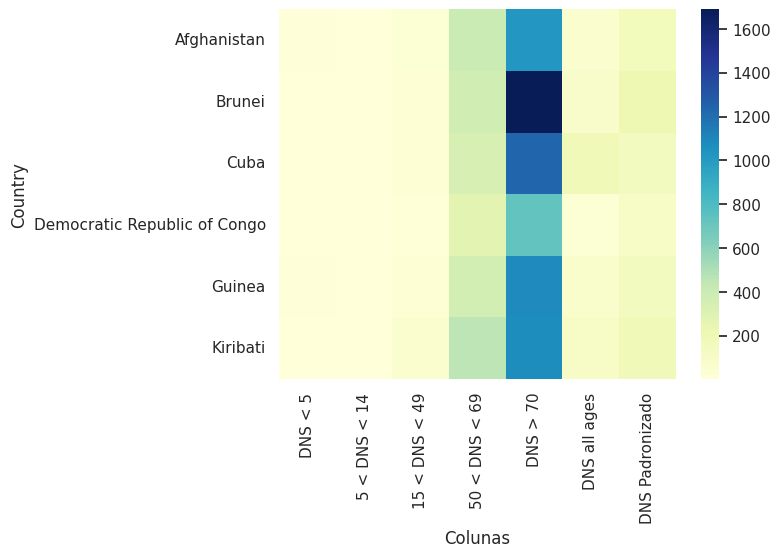

In [ ]:
# Criar um dicionário vazio para armazenar as médias
means_chosen = {}

# Calcular as médias para cada coluna selecionada
for coluna_chosen in colunas_chosen:
    means_chosen[coluna_chosen] = df_maior_menor.groupby('Country')[coluna_chosen].mean()

# Criar um dataframe com as médias e os nomes das colunas e países
df_heatmap = pd.DataFrame(means_chosen)

# Criar o heatmap usando o seaborn
sns.heatmap(df_heatmap, annot=False, cmap='YlGnBu')

# Adicione rótulos aos eixos
plt.xlabel('Colunas')
plt.ylabel('Country')

plt.show()

###2) Para cada faixa etária, qual o país com a maior taxa?



---





####Menor que 5 anos

<Axes: xlabel='Year', ylabel='DNS < 5'>

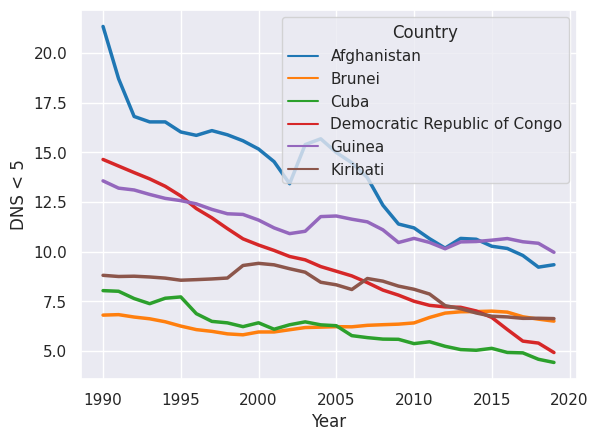

In [ ]:
#menor que 5 anos

df_maior_menor = df.loc[(df["Country"].isin(top3_maior_menor.index))]
sns.lineplot(data=df_maior_menor, x="Year", y="DNS < 5", linewidth=2.5, palette="tab10", hue="Country")

#Afghanistan

####Entre 5 e 14

<Axes: xlabel='Year', ylabel='5 < DNS < 14'>

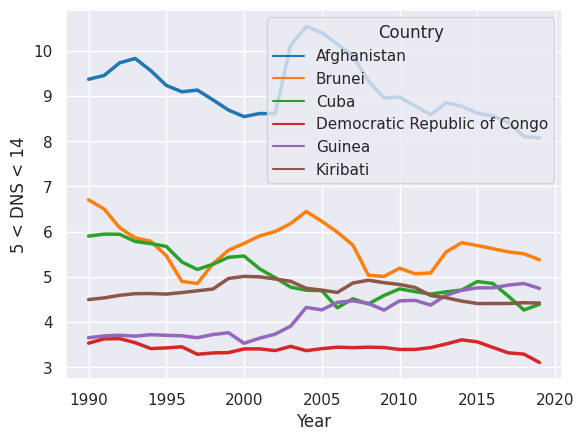

In [ ]:
df_maior_menor = df.loc[(df["Country"].isin(top3_maior_menor.index))]
sns.lineplot(data=df_maior_menor, x="Year", y="5 < DNS < 14", linewidth=2.5, palette="tab10", hue="Country")

#Afghanistan

####Entre 15 e 49

<Axes: xlabel='Year', ylabel='15 < DNS < 49'>

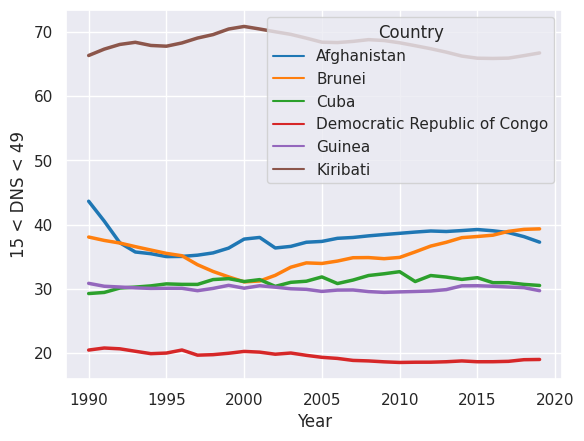

In [ ]:
df_maior_menor = df.loc[(df["Country"].isin(top3_maior_menor.index))]
sns.lineplot(data=df_maior_menor, x="Year", y="15 < DNS < 49", linewidth=2.5, palette="tab10", hue="Country")

####Entre 50 e 69

<Axes: xlabel='Year', ylabel='50 < DNS < 69'>

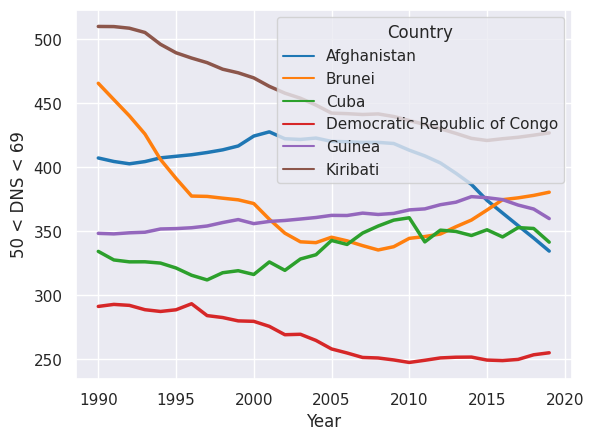

In [ ]:
df_maior_menor = df.loc[(df["Country"].isin(top3_maior_menor.index))]
sns.lineplot(data=df_maior_menor, x="Year", y="50 < DNS < 69", linewidth=2.5, palette="tab10", hue="Country")



####Maior que 70 anos

<Axes: xlabel='Year', ylabel='DNS > 70'>

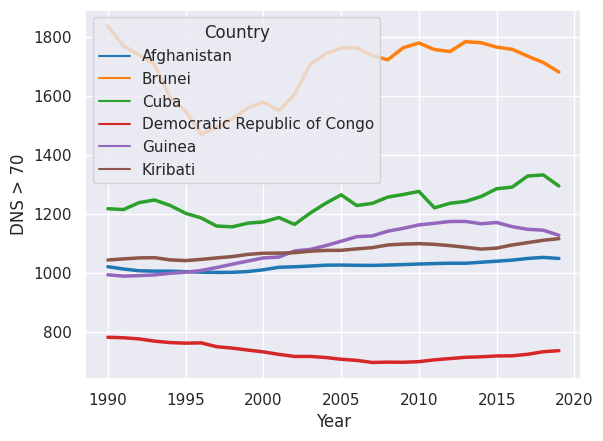

In [ ]:
df_maior_menor = df.loc[(df["Country"].isin(top3_maior_menor.index))]
sns.lineplot(data=df_maior_menor, x="Year", y="DNS > 70", linewidth=2.5, palette="tab10", hue="Country")

### 3) Qual o país mais constante?

---





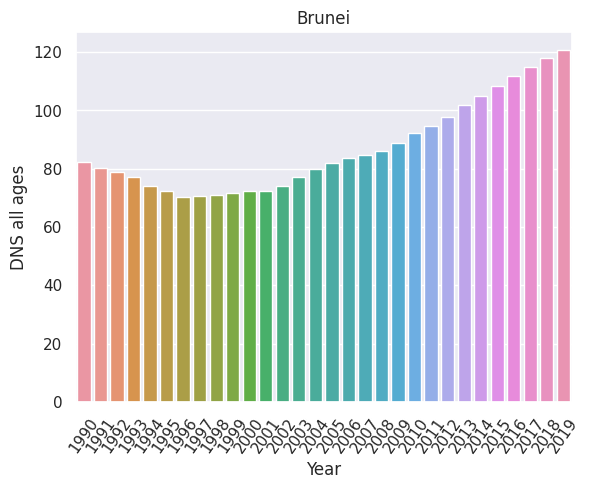

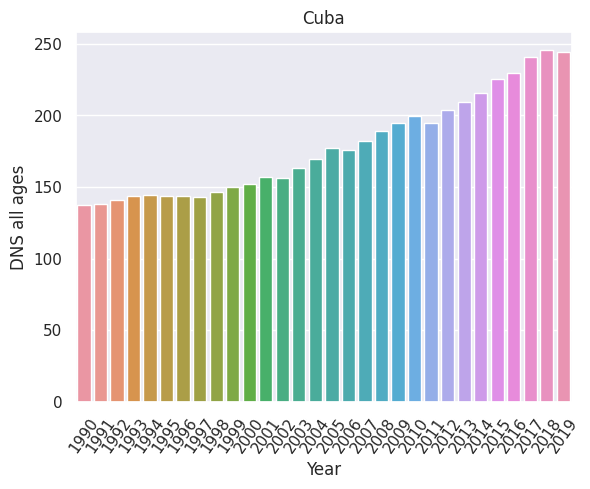

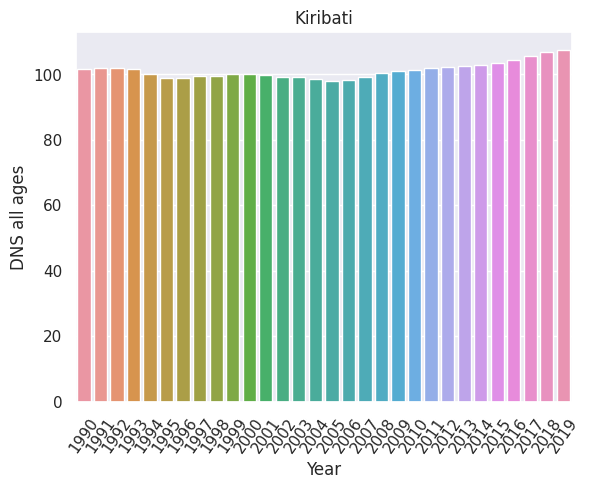

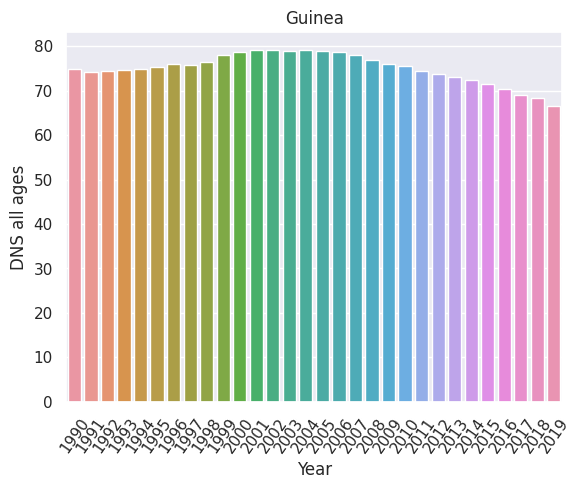

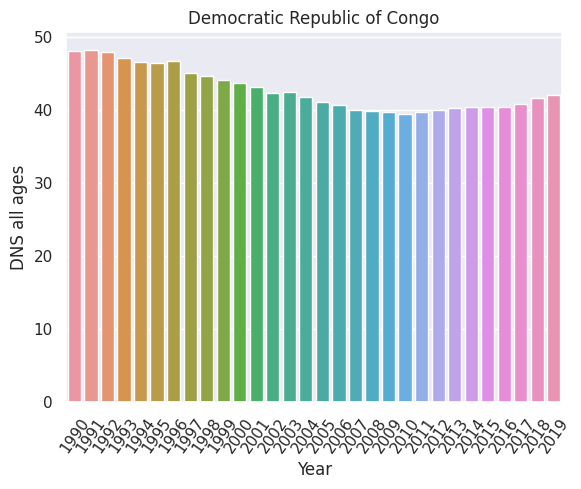

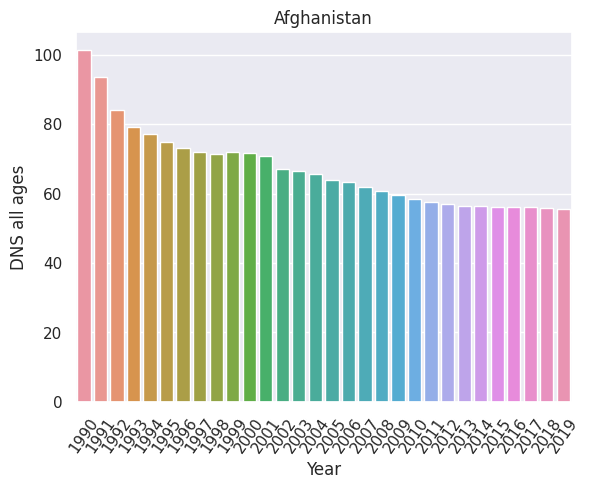

In [ ]:
for a in top3_maior_menor.index:
  df_lugar= df.loc[(df["Country"]==a)]

  sns.barplot(data=df_lugar, x="Year", y="DNS all ages").set(title=a)
  plt.xticks(rotation=55)
  plt.show(block=True)

  #Kiribati

###4) Qual o país com maior queda de casos entre 2015 e 2019?

---




####Regressão Linear

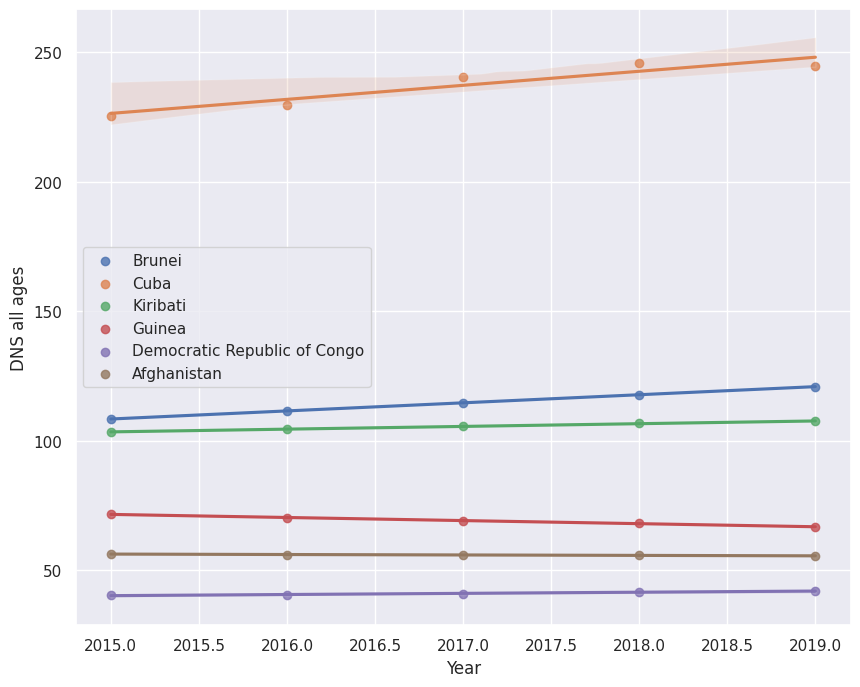

In [ ]:
plt.figure(figsize = (10, 8))


for a in top3_maior_menor.index:
  df_lugar= df.loc[(df["Country"]==a) & (df["Year"]>=2015)]

  # Define o tema do gráfico
  sns.set_theme()

  # Cria o gráfico de dispersão com a Reta de regressão
  sns.regplot(data=df_lugar, x="Year", y="DNS all ages", label=a)
  
plt.legend()


#Guinea


###5) Qual o país teve um maior crescimento, e qual país teve o maior decrescimento, em suas taxas ao passar dos anos?

---





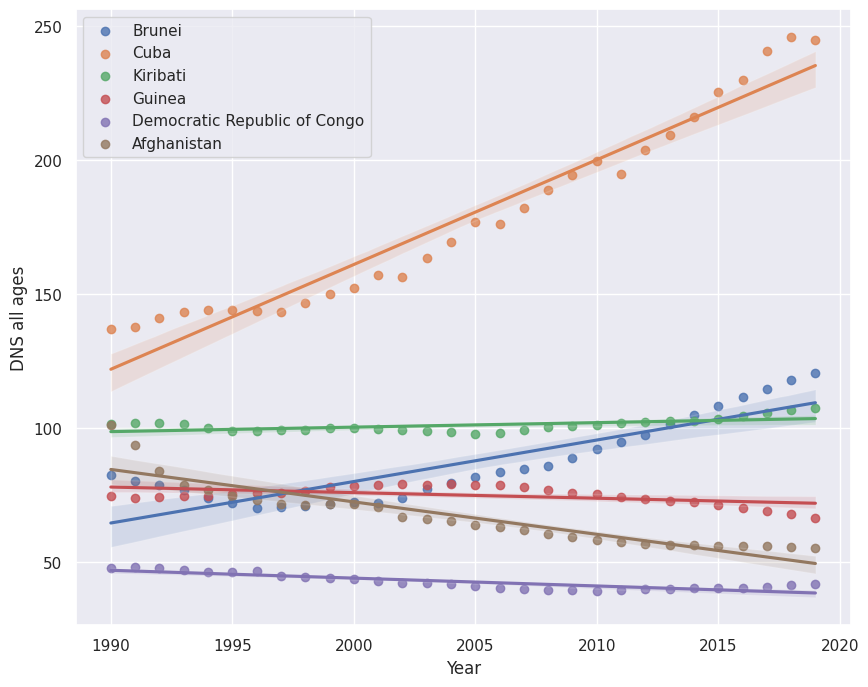

In [ ]:
plt.figure(figsize = (10, 8))

for a in top3_maior_menor.index:
  df_lugar= df.loc[(df["Country"]==a)]

  # Define o tema do gráfico
  sns.set_theme()

  # Cria o gráfico de dispersão com a Reta de regressão
  sns.regplot(data=df_lugar, x="Year", y="DNS all ages", label=a)
  
plt.legend()

#Maior crescimento: Cuba
#Maior decrescimento: Afghanistan


###6) No ano com menos casos globais, quais, entre os países pré determinados, tiveram maiores e menores, investimento público em saúde?


In [ ]:
#Ano com mais baixas entre 2002 - 2019

df_filtrado = df[df['Year'] >= 2002]
soma_casos_ano = df_filtrado.groupby('Year')['DNS all ages'].sum()
ano_menos_casos = soma_casos_ano.idxmin()

#ano_menos_casos => menor = 2002

[Text(0, 0, 'Afghanistan'),
 Text(1, 0, 'Brunei'),
 Text(2, 0, 'Cuba'),
 Text(3, 0, 'D.R. of Congo'),
 Text(4, 0, 'Guinea'),
 Text(5, 0, 'Kiribati')]

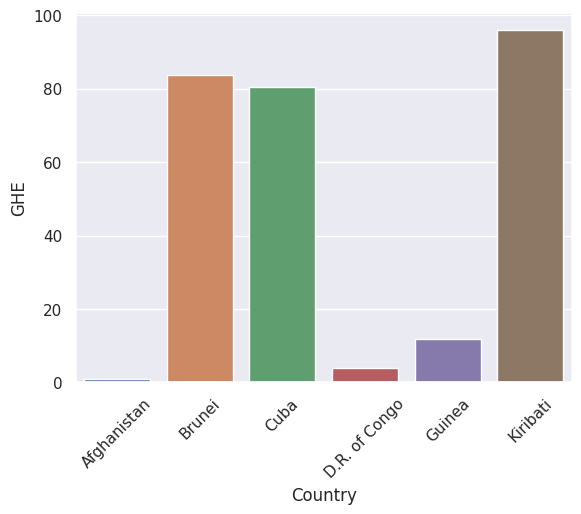

In [ ]:
rotulos_paises = ["Afghanistan", "Brunei", "Cuba", "D.R. of Congo", "Guinea", "Kiribati"]

df_chosen_2002 = df_chosen.loc[(df_he["Year"] == 2002)]
ax = sns.barplot(data=df_chosen_2002, x="Country", y="GHE")
ax.set_xticklabels(rotulos_paises, rotation=45)


#Ano com mais baixas: 2002
#País com maior investimento:
#País com menor investimento: 

#Conclusões